In [ ]:
mypath = r"C:\Users\sam\Desktop\ABA_Dataset"
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [1]:
import json

In [ ]:
print(len(onlyfiles))

In [ ]:
#只要ABA就好
puredata = []

In [ ]:
with open(join(mypath,'Fearful face.json'),'r') as fuckerfile:
    theopenfile = json.load(fuckerfile)
    ttt = []
    for k in range(0,3):
        print(theopenfile[80][k])
        ttt.append(theopenfile[80][k][1])

In [ ]:
print(ttt)

In [ ]:
for singlefile in onlyfiles:
    with open(join(mypath,singlefile),'r') as happyfiles:
        print(singlefile)
        theopenedfile = json.load(happyfiles)
        for i in range(0,len(theopenedfile)):
            transient = []
            for j in range(0,3):
                transient.append(theopenedfile[i][j][1])
            puredata.append(transient)
        happyfiles.close()


In [ ]:
print(puredata)

In [ ]:
print(len(puredata))

In [ ]:
print(len(puredata[0]))

In [ ]:
with open(r"C:\Users\sam\Desktop\Flushed face.json",'r') as jjj:
    rrr = jjj.read().replace('"','')

In [ ]:
with open(r"C:\Users\sam\Desktop\ABA_Dataset\Flushed face.json",'w') as kkkkk:
    json.dump(ddd,kkkkk)

In [ ]:
with open(r"C:\Users\sam\Desktop\Flushed face.json",'r') as jjj:
    ppp = json.load(jjj)

In [ ]:
print(len(ppp))

In [ ]:
with open(r"C:\Users\sam\Desktop\ABA_Dataset\TheAllDataset.json",'w') as theall:
    json.dump(puredata,theall)

In [ ]:
with open(r"C:\Users\sam\Desktop\ABA_Dataset\TheAllDataset.json",'r') as theall:
    ghghgh = json.load(theall)

In [ ]:
print(ghghgh)

In [ ]:
print(len(ghghgh))

In [2]:
#這些是Hyper-parameter
a = 0.6
b1 = 0.5
b2 = 0.5
g1 = 0.8
g2 = 0.8
e = 0.2

In [3]:
import numpy as np
import requests

In [4]:
#A是2說, B是1說
A = [[e,(1-a)*e*(1-b1),(1-b2)*(1-a)*e,(1-a)*e],
    [0,b1,0,0],
    [1-e,(1-b1)*(1-a)*(1-e),b2+(1-b2)*(1-a)*(1-e),(1-a)*(1-e)],
    [0,(1-b1)*a,(1-b2)*a,a]]
B = [[e,(1-a)*e*(1-b1),(1-b2)*(1-a)*e,(1-a)*e],
    [0,0,b2,0],
    [1-e,b1+(1-b1)*(1-a)*(1-e),(1-b2)*(1-a)*(1-e),(1-a)*(1-e)],
    [0,(1-b1)*a,(1-b2)*a,a]]

In [ ]:
url = "https://hf.space/embed/KLeedrug/EMO_AI_alpha/+/api/predict"
payload = {'data':[ghghgh[0][0]]}
x = requests.post(url, json = payload)
print(x.json()["data"])

In [ ]:
purenewdata = []

In [ ]:
for y in range(0,4742):
    transdata = []
    for q in range(0,3):
        payload = {'data':[ghghgh[y][q]]}
        x = requests.post(url, json = payload)
        transdata.append(x.json()["data"])
    purenewdata.append(transdata)

In [ ]:
with open(r"C:\Users\sam\Desktop\ABA_Dataset\DatasetInVA.json",'w') as VADataset:
    json.dump(purenewdata,VADataset)

## 製作資料集

In [12]:
import tensorflow as tf
from keras.models import Sequential, save_model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D, Conv1D, Reshape, BatchNormalization, Add
#mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train[0])

In [ ]:
xdata = [[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]]
ydata = [[5,5,5],[6,6,6],[7,7,7],[8,8,8]]

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4, 1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3)
])

#predictions = model(x_train[:1]).numpy()
# tf.nn.softmax(predictions).numpy()

#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss_fn(y_train[:1], predictions).numpy()

#model.compile(optimizer='adam',
#              loss=custom_mse,
#              metrics=['accuracy'])
#model.fit(xdata, ydata, epochs=10)
#model.evaluate(x_test,  y_test, verbose=2)
print(model.summary())

In [ ]:
print(ffff[600])
print(ffff[601])
print(ffff[602])

In [6]:
print(len(ffff)/3)

4742.0


In [5]:
import pickle
with open(r"C:\Users\sam\DeskTop\LoopData\puredataset2.pkl",'rb') as mdfk:
    ffff = pickle.load(mdfk)

In [ ]:
with open(r"C:\Users\sam\DeskTop\LoopData\TestTrain.json",'r') as mdfk2:
    hhhh = json.load(mdfk2)

In [ ]:
#都是用S, VA1, VA2, F的順序來弄
ggg = np.array(ffff[0][0][0])
ep0 = [[0,0], [0,0], [0,0], [0,0]]
ep1 = [ggg,(1-b1)*(1-a)*ggg,(1-b2)*(1-a)*ggg,(1-a)*ggg]

In [ ]:
print(ep1)

In [ ]:
ep2byloop = np.dot(ep1,B)

In [ ]:
print(ep2byloop)

In [ ]:
S2 = ffff[0][1][0]
F2 = a*ep1[3]+(1-a)*S2
VA12 = b1*ep1[1]+(1-b1)*F2
VA22 = b2*ep1[2]+(1-b2)*F2

ep2byemo = [S2, VA12, VA22, F2]

In [ ]:
print(ep2byemo)

In [ ]:
ep3 = np.dot(ep2byemo,A)

In [ ]:
print(ep3)

In [ ]:
question = [ep2byemo[0], ep2byemo[1], ep2byemo[2],ffff[0][2][0]]
answer = [ep3[0], ep3[1], ep3[2]]

In [7]:
xdata = []#題目
ydata = []#答案

In [ ]:
t = 0
for h in range(0,4742):
    ep1 = [[0,0],[0,0],[0,0],[0,0]]
    
    ep2 = [[0,0],[0,0],[0,0]]
    ep3 = [[0,0],[0,0],[0,0],[0,0]]
    ep4 = [[0,0],[0,0],[0,0]]
    trans1 = []
    trans2 = []
    trans3 = []
    trans4 = []
    for r in range(0,2):
        ggg = np.array(ffff[3*h][r])
        ggg = ggg.tolist()
        trans1 = [ggg,(1-b1)*(1-a)*ggg,(1-b2)*(1-a)*ggg,(1-a)*ggg]
        trans2 = np.dot(trans1,B)
        ep1[0][r] = trans1[1]
        ep1[1][r] = trans1[2]
        ep1[2][r] = trans1[3]
        ep1[3][r] = np.array(ffff[3*h+1][r]).tolist()
        ep2[0][r] = trans2[1]
        ep2[1][r] = trans2[2]
        ep2[2][r] = trans2[3]
        
        S2 = ffff[3*h+1][r]
        F2 = a*trans1[3]+(1-a)*S2
        VA12 = b1*trans1[1]+(1-b1)*F2
        VA22 = b2*trans1[2]+(1-b2)*F2
        trans3 = [S2, VA12, VA22, F2]
        trans4 = np.dot(trans3,A)
        
        ep3[0][r] = trans3[1]
        ep3[1][r] = trans3[2]
        ep3[2][r] = trans3[3]
        ep3[3][r] = np.array(ffff[3*h+2][r]).tolist()
        ep4[0][r] = trans4[1]
        ep4[1][r] = trans4[2]
        ep4[2][r] = trans4[3]
    xdata.append(ep1)
    xdata.append(ep3)
    ydata.append(ep2)
    ydata.append(ep4)
    print(t)
    t = t+1

In [ ]:
print(xdata)

In [ ]:
print(xdata)

In [ ]:
with open(r"C:\Users\sam\Desktop\LoopData\Question3.json",'w') as theq:
    json.dump(xdata,theq)

In [ ]:
with open(r"C:\Users\sam\Desktop\LoopData\Answer3.json",'w') as thea:
    json.dump(ydata,thea)

In [18]:
with open(r"C:\Users\sam\Desktop\LoopData\Question3.json",'r') as eee:
    theque = json.load(eee)
    print(len(theque))

9484


In [19]:
with open(r"C:\Users\sam\Desktop\LoopData\Answer3.json",'r') as mmm:
    theans = json.load(mmm)
    print(len(theans))

9484


In [16]:
import random

In [17]:
shufque = random.shuffle(theque)
shufans = random.shuffle(theans)

In [20]:
tfque = tf.convert_to_tensor(theque,dtype = tf.float32)
tfans = tf.convert_to_tensor(theans,dtype = tf.float32)

In [ ]:
xdata = [[[1,1],[1,1],[1,1],[1,1]],[[1,1],[1,1],[1,1],[1,1]],[[1,1],[1,1],[1,1],[1,1]],[[1,1],[1,1],[1,1],[1,1]]]
ydata = [[[1,1],[1,1],[1,1]],[[1,1],[1,1],[1,1]],[[1,1],[1,1],[1,1]],[[1,1],[1,1],[1,1]]]

#xdata = xdata.reshape(-1,4,2,1)
#xdata = xdata.reshape(-1,3,2,1)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,2,1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(6),
  tf.keras.layers.Reshape((3,2),input_shape = (6,))
])

#predictions = model(x_train[:1]).numpy()
# tf.nn.softmax(predictions).numpy()

#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss_fn(y_train[:1], predictions).numpy()

print(model.summary())

model.compile(optimizer='adam',
              loss=custom_mse,
              metrics=['accuracy'])
model.fit(xdata, ydata, epochs=10)
#model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
def custom_mse(y_true, y_pred):
    
    y_true = tf.cast(y_true,dtype = tf.float32)
    # calculating squared difference between target and predicted values
    loss = 0
    for t in range (0,1):
        loss += 10000*(y_true[0][t]-y_pred[0][t])*(y_true[0][t]-y_pred[0][t])+(y_true[1][t]-y_pred[1][t])*(y_true[1][t]-y_pred[1][t])+(y_true[2][t]-y_pred[2][t])*(y_true[2][t]-y_pred[2][t])
                
    # summing both loss values along batch dimension 
    #loss = K.sum(loss, axis=1)        # (batch_size,)
    
    return loss

In [35]:
xdata = tfque
ydata = tfans

#xdata = xdata.reshape(-1,4,2,1)
#xdata = xdata.reshape(-1,3,2,1)

def Squeeze(x,filters, kernel_size, in_1, pool_size, in_2):
  x = tf.keras.layers.Conv2D(filters = filters, kernel_size = kernel_size, padding = 'same', input_shape = in_1, activation = 'relu')(x)
  x = tf.keras.layers.MaxPooling2D(pool_size = pool_size, padding = 'same')(x)
  x = tf.keras.layers.Dense(2*filters, input_shape = in_2)(x)
  x = tf.keras.layers.SpatialDropout2D(0.3)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  return x

def ResNet_Minimal(initial,filters, in_1):
  x = tf.keras.layers.Conv2D(filters = filters, kernel_size = (1,1), padding = 'same', input_shape = in_1, activation = 'relu')(initial)
  x = tf.keras.layers.Conv2D(filters = filters, kernel_size = (3,3), padding = 'same', input_shape = in_1, activation = 'relu')(x)
  x = tf.keras.layers.Conv2D(filters = 2*filters, kernel_size = (1,1), padding = 'same', input_shape = in_1, activation = 'relu')(x)
  #shortcut = tf.keras.layers.Conv2D(filters = 2*filters, kernel_size = (1,1), padding = 'same', input_shape = in_1, activation = 'relu')(initial)
  x = tf.keras.layers.Add()([x,initial])
  x = tf.keras.layers.BatchNormalization()(x)
  return x

input=tf.keras.Input(shape=(4,2,1))
x = Squeeze(input,32,(2,2),(4,2,1),(1,1),(4,2))
x = ResNet_Minimal(x,32,(4,2,1))
x = Squeeze(x,64,(2,2),(4,2,1),(2,2),(2,1))
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(32,activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(6,activation='relu')(x)
output = tf.keras.layers.Reshape((3,2),input_shape = (6,))(x)

final=tf.keras.Model(inputs=input,outputs=output)

#model = tf.keras.models.Sequential([
#  tf.keras.layers.Flatten(input_shape=(4,2,1)),
#  tf.keras.layers.Dense(128, activation='relu'),
#  tf.keras.layers.Dropout(0.2),
#  tf.keras.layers.Dense(32, activation='relu'),
#  tf.keras.layers.Dropout(0.2),
#  tf.keras.layers.Dense(6),
#  tf.keras.layers.Reshape((3,2),input_shape = (6,))
#])

#predictions = model(x_train[:1]).numpy()
# tf.nn.softmax(predictions).numpy()

#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss_fn(y_train[:1], predictions).numpy()

print(final.summary())

final.compile(optimizer='adam',
              loss=keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
history = final.fit(xdata, ydata, validation_split = 0.1, epochs=20)
#model.evaluate(x_test,  y_test, verbose=2)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 4, 2, 1)]    0           []                               
                                                                                                  
 conv2d_15 (Conv2D)             (None, 4, 2, 32)     160         ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 4, 2, 32)    0           ['conv2d_15[0][0]']              
                                                                                                  
 dense_35 (Dense)               (None, 4, 2, 64)     2112        ['max_pooling2d_6[0][0]']        
                                                                                            

267/267 [==============================] - 5s 18ms/step - loss: 0.0014 - accuracy: 0.9825 - val_loss: 0.0021 - val_accuracy: 0.9852
Epoch 19/20
267/267 [==============================] - 5s 17ms/step - loss: 0.0014 - accuracy: 0.9825 - val_loss: 0.0013 - val_accuracy: 0.9852
Epoch 20/20
267/267 [==============================] - 5s 17ms/step - loss: 0.0013 - accuracy: 0.9825 - val_loss: 0.0010 - val_accuracy: 0.9852


In [24]:
xdata = tfque
ydata = tfans

print(len(xdata))

#xdata = xdata.reshape(-1,4,2,1)
#xdata = xdata.reshape(-1,3,2,1)

model5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,2,1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(6),
  tf.keras.layers.Reshape((3,2),input_shape = (6,))
])

checkpoint_path = "training_7/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_freq = 297,
                                                 verbose=1)

#predictions = model(x_train[:1]).numpy()
# tf.nn.softmax(predictions).numpy()

#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss_fn(y_train[:1], predictions).numpy()

print(model5.summary())

model5.compile(optimizer='adam',
              loss=keras.losses.MeanSquaredError(),
              #metrics=[tf.keras.metrics.MeanSquaredError()])
              metrics=['Accuracy'])
history = model5.fit(xdata, ydata, epochs=10, validation_split = 0.2, callbacks=[cp_callback])
#model.evaluate(x_test,  y_test, verbose=2)

9484
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 8)                 0         
                                                                 
 dense_30 (Dense)            (None, 128)               1152      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dropout_20 (Dropout)        (None, 32)          

In [30]:
from matplotlib import pyplot as plt

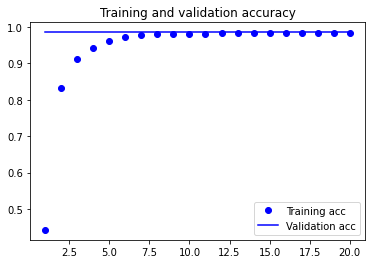

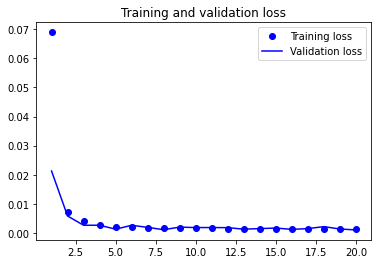

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
final.save('testifworks')

INFO:tensorflow:Assets written to: testifworks\assets


INFO:tensorflow:Assets written to: testifworks\assets


In [11]:
import os
import keras

In [33]:
modelf = keras.models.load_model('testifworks')

In [34]:
print(modelf.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 4, 2, 1)]    0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 4, 2, 32)     160         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 4, 2, 32)    0           ['conv2d_10[0][0]']              
                                                                                                  
 dense_20 (Dense)               (None, 4, 2, 64)     2112        ['max_pooling2d_4[0][0]']        
                                                                                            